In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display

import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, GRU, Input, Conv1D, MaxPooling1D
from sklearn.metrics import confusion_matrix, classification_report

## DATALOADER

In [ ]:
X_train = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_train.npy')
X_test = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_test.npy')
X_val = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_val.npy')

In [ ]:
X_train[0].shape

(98,)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(16893, 98) (16893, 2)
(2109, 98) (2109, 2)
(2088, 98) (2088, 2)


## CRNN - Review Later

In [ ]:
from keras.layers import Input, LSTM, GRU, Dense, Embedding, Conv1D, MaxPooling1D, Activation
from keras.layers import Reshape, Softmax, Permute, Multiply, dot, concatenate
from keras.layers import BatchNormalization
from keras.models import Model

inputs = Input(shape=(98,1))

gru1 = GRU(128, return_sequences=False)(inputs)

q = Dense(128)(gru1)
k = Dense(128)(gru1)
v = Dense(128)(gru1)

q = Reshape((1, 128))(q)
k = Reshape((1, 128))(k)
v = Reshape((1, 128))(v)

attention = dot([q, k], axes=[2, 2])
attention = Activation('softmax')(attention)

output = dot([attention, v], axes=[2, 1])
output = Reshape((128,))(output)

output = Dense(2, activation='softmax')(output)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(amsgrad=True), loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 98, 1)]      0           []                               
                                                                                                  
 gru (GRU)                      (None, 128)          50304       ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 128)          16512       ['gru[0][0]']                    
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['gru[0][0]']                    
                                                                                              

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(amsgrad=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 120, shuffle = False)

Epoch 1/120
528/528 [==============================] - 16s 11ms/step - loss: 0.6929 - accuracy: 0.5260 - val_loss: 0.6659 - val_accuracy: 0.6006
Epoch 2/120
528/528 [==============================] - 4s 7ms/step - loss: 0.6054 - accuracy: 0.6598 - val_loss: 0.5311 - val_accuracy: 0.7256
Epoch 3/120
528/528 [==============================] - 4s 8ms/step - loss: 0.4538 - accuracy: 0.7928 - val_loss: 0.3787 - val_accuracy: 0.8238
Epoch 4/120
528/528 [==============================] - 5s 10ms/step - loss: 0.3538 - accuracy: 0.8428 - val_loss: 0.3223 - val_accuracy: 0.8525
Epoch 5/120
528/528 [==============================] - 4s 8ms/step - loss: 0.3105 - accuracy: 0.8666 - val_loss: 0.2999 - val_accuracy: 0.8673
Epoch 6/120
528/528 [==============================] - 5s 9ms/step - loss: 0.2951 - accuracy: 0.8731 - val_loss: 0.2784 - val_accuracy: 0.8755
Epoch 7/120
528/528 [==============================] - 5s 9ms/step - loss: 0.2798 - accuracy: 0.8817 - val_loss: 0.2717 - val_accuracy: 0.8

In [ ]:
print("Model Score: \n")
score = model.evaluate(X_test, y_test)
print(score)
model.save("GRU-Multihead-Augmented.h5")

Model Score: 

66/66 [==============================] - 1s 7ms/step - loss: 0.2753 - accuracy: 0.9545
[0.2753034830093384, 0.954480767250061]


##METRICS

In [ ]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9472 sha256=e68386fc68075a1faa6862301c54b784adf7169b4d6930e0e2a0659b8e43a1cd
  Stored in directory: /root/.cache/pip/wheels/97/a5/76/35ae3e15da1ce4530de8591b0bcd7716f6d6752a4808f01c04
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320514 sha256=0dc2b3a2fdf0ce1525b00d8021dc5e59f7a896dbeef9636741598084c33282d0
  Stored in directory: /root/.cache/pip/wheels/a3/5f/ba/ddd191edb6c749a63cffabd28714d5600b5b58014daf7434a8
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

(<Figure size 1000x500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb08159b3d0>,
       dtype=object))

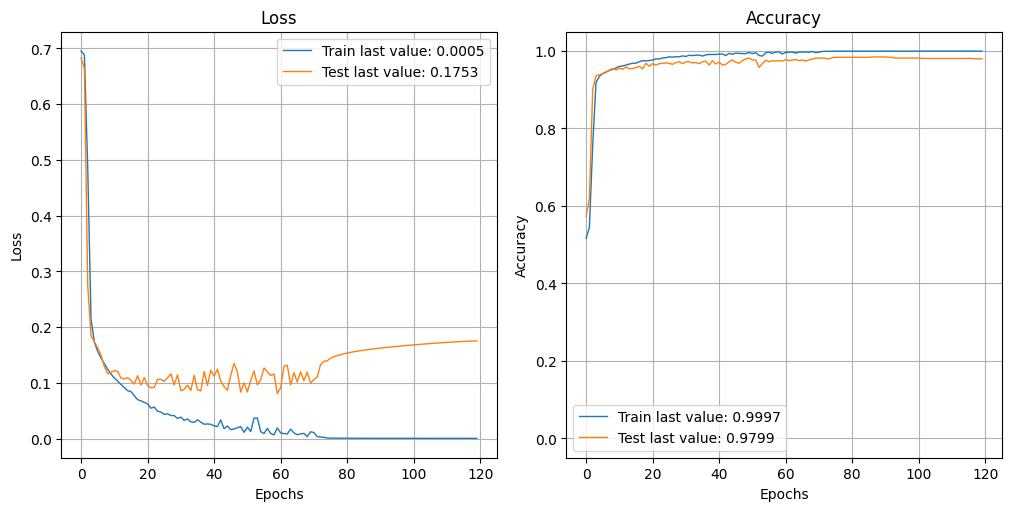

In [ ]:
from plot_keras_history import show_history, plot_history
plot_history(history)

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model Classification Report: 

66/66 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1049
           1       0.98      0.98      0.98      1060

    accuracy                           0.98      2109
   macro avg       0.98      0.98      0.98      2109
weighted avg       0.98      0.98      0.98      2109

Confusion matrix, without normalization
[[1028   21]
 [  19 1041]]


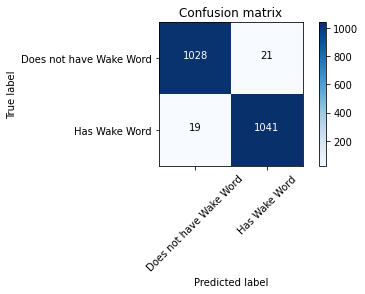

In [ ]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])